
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 23rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please make sure that **your filename includes your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1a - Stochastic Gradient Descent (25pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.

<img src="https://imgur.com/lQD73zb.png">

2. (15pts) Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).

In [205]:
from sklearn.metrics import mean_squared_error
import numpy as np

class sgd_apm:
    def __init__(self, learning_rate, regularization_constant, epochs, params_init = None):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.epochs = epochs
        if params_init is not None:
            self.params = np.array(params_init)
        else:
            self.params = np.zeros(4)

    def fit(self, x, y, update_rule = 'SGD'):
        def evaluate_gradient(data, params, reg):
            y, x1, x2 = data
            w0, w1, w2, w3 = params
            g0 = -2*(y - (w0 + w1*x1 + w2*x1*x1 + w3*x1*x2)) + reg*w0
            g1 = -2*x1*(y - (w0 + w1*x1 + w2*x1*x1 + w3*x1*x2)) + reg*w1
            g2 = -2*x1*x1*(y - (w0 + w1*x1 + w2*x1*x1 + w3*x1*x2)) + reg*w2
            g3 = -2*x1*x2*(y - (w0 + w1*x1 + w2*x1*x1 + w3*x1*x2)) + reg*w3
            return np.array([g0,g1,g2,g3])        
        self.w = []
        self.w0 = []
        self.w1 = []
        self.w2 = []
        self.w3 = []
        self.mse = []
        n = x.shape[0]
        x1 = x[:,0]
        x2 = x[:,1]
        data = np.column_stack((y,x))
        cache = np.zeros(4)
        for i in range(self.epochs):
            #np.random.shuffle(data)       
            for d in data:
                params_grad = evaluate_gradient(d, self.params, self.regularization_constant)
                if update_rule == 'rmsprop':
                    cache = 0.9*cache + 0.1*params_grad**2
                    self.params = self.params - self.learning_rate/np.sqrt(cache + 1e-6) * params_grad
                if update_rule == 'momentum':
                    cache = 0.9*cache - (self.learning_rate)*params_grad
                    self.params = self.params + cache
                else:
                    self.params = self.params - self.learning_rate * params_grad
            predict = self.params[0] * np.ones(n) + self.params[1]*x1 + self.params[2]*x1*x1 + self.params[3]*x1*x2
            self.w.append(self.params)
            self.w0.append(self.params[0])
            self.w1.append(self.params[1])
            self.w2.append(self.params[2])
            self.w3.append(self.params[3])
            self.mse.append(mean_squared_error(y,predict))
    
    def predict(self, x):
        x1 = x[:,0]
        x2 = x[:,1]
        n = x.shape[0]
        predict = self.params[0] * np.ones(n) + self.params[1]*x1 + self.params[2]*x1*x2 + self.params[3]*x2
        return predict

In [208]:
# Import the data
import pandas as pd

data1 = pd.read_csv('samples.csv', index_col = 0)
X = data1.drop(columns='y').values
y = data1['y']

In [244]:
# Find the best settings for the data
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

lr_set = [.0001, .001, .01, 0.1, 1, 10, 100]
reg_set = [0,10,100]
methods = ['sgd', 'momentum', 'rmsprop']
best_sgd = []
for method in methods:
    MSE_sgd = []
    for i in lr_set:
        for value in reg_set:
            try:
                gd = sgd_apm(i,value,10)
                gd.fit(X,y,update_rule = method)
                MSE_sgd.append((i,value,gd.mse[-1]))
            except:MSE_sgd.append((i,value,99999))
    MSE_sgd.sort(key = lambda x: x[2])
    best_sgd.append((MSE_sgd[0][0],MSE_sgd[0][1]))
    print ('Best combination for {}: learning rate = {}, regularization = {}, MSE = {}'.format(method,MSE_sgd[0][0],MSE_sgd[0][1],MSE_sgd[0][2]))

Best combination for sgd: learning rate = 0.001, regularization = 0, MSE = 0.00490872178028
Best combination for momentum: learning rate = 0.0001, regularization = 0, MSE = 0.00484632517541
Best combination for rmsprop: learning rate = 0.001, regularization = 0, MSE = 0.00098706351375


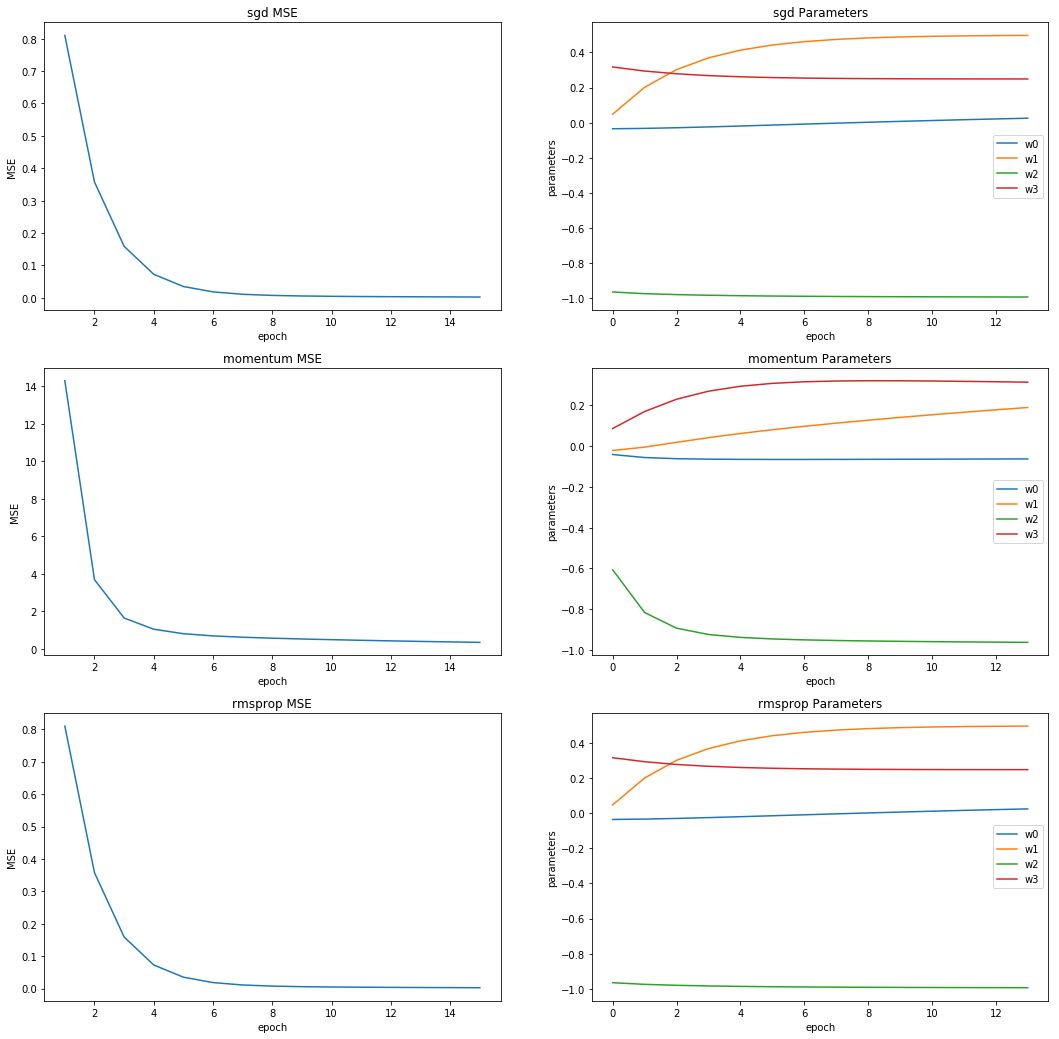

In [243]:
from sklearn.model_selection import (train_test_split,KFold)
from matplotlib.pyplot import *
import glob
%matplotlib inline

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = subplots(3,2,figsize = (18,18))
ax = [ax1,ax2,ax3,ax4,ax5,ax6]
epoch = range(1,16)
for (i,(lr,reg)) in enumerate(best_sgd):
    gd = sgd_apm(lr,reg,15)
    gd.fit(X,y,update_rule = 'SGD')
    mse = gd.mse
    ax[2*i].plot(epoch,mse,label='MSE')
    ax[2*i].set_title('{} MSE'.format(methods[i]))
    ax[2*i].set_xlabel('epoch')
    ax[2*i].set_ylabel('MSE')
    ax[2*i+1].plot(range(len(gd.w0)-1),gd.w0[:-1],label='w0')
    ax[2*i+1].plot(range(len(gd.w1)-1),gd.w1[:-1],label='w1')
    ax[2*i+1].plot(range(len(gd.w2)-1),gd.w2[:-1],label='w2')
    ax[2*i+1].plot(range(len(gd.w3)-1),gd.w3[:-1],label='w3')
    ax[2*i+1].set_title('{} Parameters'.format(methods[i]))
    ax[2*i+1].set_xlabel('epoch')
    ax[2*i+1].set_ylabel('parameters')
    ax[2*i+1].legend()

3. (2pts) Report the MSE at the end of 15 epochs for both combinations.

In [248]:
options = [[0.001,0,'sgd'],[0.0001,0,'momentum'],[0.001,0,'rmsprop']]
def run_sgd(lr,rc,rule):
    sgd = sgd_apm(lr, rc, 15)
    sgd.fit(X,y,rule)
    return sgd.mse
j=0
for i in options:
    mse = run_sgd(i[0],i[1],i[2])
    print str(options[j][2]), ' ',mse[14]
    j+=1

sgd   0.002692724650811375
momentum   0.002573218476287316
rmsprop   0.000487945217078362


4. (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?

Since the learning rate of rmsprop is adjusted by the sum of gradients (square root of cache), rmsprop allows for larger initial setting of learning rate.

# Notes on SGD with momentum
Momentum helps accelerate SGD in relevant direction and dampens the oscillations. It tries to maintain the direction in which the gradient vector was already pointing and adjusts the direction slowly with the new gradients. The steps can be listed below :
1. v[t] = mu * v[t-1] - (learning_rate)*(gradient)
2. w = w + v

Set mu = 0.90. Initialize v with zeros.


# Notes on RMSProp
RMSProp (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.  In particular, it uses a moving average of squared gradients as cache. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = (decay_rate)*(cache) + (1 - decay_rate)*(gradients^2) 
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

Use decay_rate = 0.90. Initialize cache with zeros.

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target'].values
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((181200, 14), (181200,), (60400, 14), (60400,))


/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.

In [105]:
size = [2, 10, 30, 50]
for i in size:
    MLP = MLPRegressor(hidden_layer_sizes = (i,),activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                       random_state=42,batch_size=30, learning_rate_init = 0.005)
    n_folds = 5
    kfold = KFold(n_splits = n_folds)
    avg_rmse = 0
    for train, test in kfold.split(X_train):
        MLP.fit(X_train[train], y_train[train])
        avg_rmse = avg_rmse + np.sqrt(mean_squared_error(y_train[test], MLP.predict(X_train[test])))
    print 'Average RMSE for ' + str(i) + ' hidden layers is: ' + str(avg_rmse/n_folds)

Average RMSE for 2 hidden layers is: 228.67214180067944
Average RMSE for 10 hidden layers is: 209.75479249859254
Average RMSE for 30 hidden layers is: 153.82738818993738
Average RMSE for 50 hidden layers is: 118.64298451679583


2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [107]:
size = [2, 10, 30, 50]
for i in size:
    MLP = MLPRegressor(hidden_layer_sizes = (i,),activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                       random_state=42,batch_size=30, learning_rate_init = 0.005)
    MLP.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, MLP.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, MLP.predict(X_test)))
    print 'Training RMSE for ' + str(i) + ' hidden layers is: ' + str(train_rmse)
    print 'Testing RMSE for ' + str(i) + ' hidden layers is: ' + str(test_rmse)

Training RMSE for 2 hidden layers is: 228.38824455576272
Testing RMSE for 2 hidden layers is: 223.0638585977787
Training RMSE for 10 hidden layers is: 161.95498956066047
Testing RMSE for 10 hidden layers is: 158.04815317730262
Training RMSE for 30 hidden layers is: 154.00075261846075
Testing RMSE for 30 hidden layers is: 151.38605425444328
Training RMSE for 50 hidden layers is: 81.969784086948
Testing RMSE for 50 hidden layers is: 81.54145973523119


The best performing model is the 50 hidden layer model. For this data, we find that as hidden layers increase, the RMSE continues to decrease. We can assume that it will decrease beyond 50 hidden layers, so if we wanted to improve this model, we could increase the number of hidden layers until the testing RMSE starts to increase.

3) (5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using below conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* valu;:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

Text(0,0.5,'Root Loss')

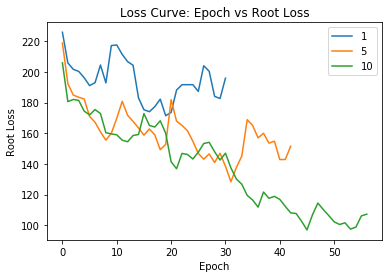

In [141]:
mlps = []
size = [1, 5, 10]
for i in size:
    mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, 
                       batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes = i)
    mlp.fit(X_train,y_train)
    mlps.append(mlp)

for mlp,i in zip(mlps,size):
    plt.plot(np.sqrt(mlp.loss_curve_), label = i)
plt.legend()
plt.title('Loss Curve: Epoch vs Root Loss')
plt.xlabel('Epoch')
plt.ylabel('Root Loss')

# Question 3 - [Kaggle Competition] Mercedes-Benz Greener Manufacturing (25 pts)

In this problem, we are going to explore a Kaggle competition: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

I have converted the categorical variables to numbers. The dataset is available as **'q3_train.csv'** and **'q3_test.csv'** along with the assignment. Please use this dataset for building your models. Upload your predicted values to kaggle to get the score.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any outlier and remove them).
 * Impute the missing values (if any).
 
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression and multilayer perceptron. For Lasso and Ridge regression, optimize the alphas using cross validation. Multilayer perceptron can have one hidden layer. You may try other predictive models to get better scores (optional). 
3. Get a score of 0.51 or higher on the **Private Leaderboard**. Take a screenshot of your private score after submission as proof. You can click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score. Your highes score should be visible in the screenshot.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [167]:
from sklearn.decomposition import PCA

# Data Preprocessing
data_train = pd.read_csv('q3_train.csv')
data_test = pd.read_csv('q3_test.csv')

# Are there missing values
sum(np.sum(np.isnan(data_train))) # 0 in train
sum(np.sum(np.isnan(data_test))) # 0 in test

# Take off ID
data_train = data_train.drop(columns='ID')
data_test = data_test.drop(columns='ID')
data_train.shape # 4209 x 377
data_test.shape # 4209 x 376

# Store the data the way we like it
X_train = data_train.drop(columns='y').values
y_train = data_train['y']
X_test = data_test.values

# Scale the data
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

# Do PCA on all of the X's
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
sum(pca.explained_variance_ratio_) # We fit 85% of the variance in the data using 100 components
X_test_pca = pca.transform(X_test)

In [249]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Predictive Models

# LASSO
lasso = Lasso(random_state=42)
alphas =  10**np.linspace(10,-6,100)*0.5

# Cross Validation - Commented out to reduce run times
#tuned_parameters = [{'alpha': alphas}]
#n_folds = 5
#lasso_model = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
#lasso_model.fit(X_train, y_train)
#best_alpha = lasso_model.best_params_['alpha'] # Best alpha as chosen by CV

lasso_tuned = Lasso(alpha = best_alpha, random_state=42)
lasso_tuned.fit(X_train, y_train)
lasso_rmse = np.sqrt(mean_squared_error(y_train, lasso_tuned.predict(X_train)))
print 'RMSE for Lasso is: ' + str(lasso_rmse)

# Ridge
ridge = Ridge(random_state=42)

# Cross Validation - Commented out to reduce run times
#tuned_parameters = [{'alpha': alphas}]
#ridge_model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
#ridge_model.fit(X_train, y_train)
#scores = ridge_model.cv_results_['mean_test_score']
#ridge_best_alpha = ridge_model.best_params_['alpha'] # Best alpha as chosen by CV

ridge_tuned = Ridge(alpha = ridge_best_alpha, random_state=42)
ridge_tuned.fit(X_train, y_train)
ridge_rmse = np.sqrt(mean_squared_error(y_train, ridge_tuned.predict(X_train)))
print 'RMSE for Ridge is: ' + str(ridge_rmse)

# MLP with 1 hidden layer and KFold = 5
MLP = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
                   batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes = 1)
MLP.fit(X_train,y_train)
kfold = KFold(n_splits = n_folds)
avg_rmse = 0
for train, test in kfold.split(X_train):
    MLP.fit(X_train[train], y_train[train])
    avg_rmse = avg_rmse + np.sqrt(mean_squared_error(y_train[test], MLP.predict(X_train[test])))
print 'Average RMSE for MLP is: ' + str(avg_rmse/n_folds)

RMSE for Lasso is: 8.363125477832469
RMSE for Ridge is: 8.168004497990868
Average RMSE for MLP is: 9.699576158239973


In [250]:
# Prep the submission

id_retrieval = pd.read_csv('q3_test.csv')
preds = pd.DataFrame(id_retrieval['ID'])
preds['y'] = ridge_tuned.predict(X_test)
preds = preds.set_index('ID')
preds.to_csv('apm_hw3_3.csv')

Part 1: Data Preprocessing
The ID variable was removed as it is not a variable for fitting. The data sets were checked for missing values - there were none. Standard scaler was used to scale the training and testing X data. Since there were over 350 variables, we tried using PCA to lower it to 100 variables. We were satisfied with this as our principal components were able to explain 85% of the variance in the model.

Part 2: Model Fitting
For the following analyses, the scaled X data was used, not the PCA variables (will be explained later):
LASSO and Ridge models were fit using the best alpha as found by cross-validation with GridSearchCV and 5 folds. The training RMSE for these models were 8.363 and 8.168, respectively. Then, MLPRegressor was used to fit the data using 1 hidden layer and the settings defined in Question 2. The average RMSE for 5 folds of model fitting was 9.700. Based on the training data, the ridge model had the lowest error and was used to generate the final predictions.

Part 3: Kaggle Submission
For the Kaggle submission, we needed to reattach the ID numbers to our predictions. When submitting the ridge model predictions made using the scaled testing data transformed with PCA from the training data, we got a score of .499. Unfortunately, this was not high enough to satisfy this homework's score requirement. When submitting ridge model predictions made using the scaled testing data only, we ended up with a score of .523. This makes sense as the non-PCA data contains the remaining 15% of the variance in the data and uses that information in generating prediction. What we can say about this approach is that the remaining 15% of variance not found with PCA was responsible for the .02 point boost in the R-squared value. 

<img src="https://imgur.com/IQXta6k.png">

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

Class conditional likelihood (P(C$_{1}$) is the likelihood that an input given is the input that belogs to the class

Class prior (P(X|C$_{1}$)) is the reflected likelehood that a value for a random variable represents the state of nature of an input in the absence of information

Posterior probability (P(C$_{1}$|X)) is the probability of an input belonging to a class given the input

The relationship between the terms is given by -
$P(C_{i}|x) = \frac{P(C_{i}) * P(x|C_{i})}{P(x_{i})}$

The relationship between them at the decision boundary- <br>

$P(C_{1}|x_{1},x_{2}) = P(C_{2}|x_{1},x_{2})$ <br>

or <br>

$ln(P(x_{1},x_{2}|C_{1})) + ln(P(C_{1})) = ln(P(x_{1},x_{2}|C_{2})) + ln(P(C_{2}))$ <br>

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

<i>Using the equations outlined above</i>

$\frac{-1}{2}*[(x_{1} - 40)^{2}*(x_{2} - 27)^{2}] + ln(0.2) = \frac{-1}{2}*[(x_{1} - 16)^{2} + (x_{2} - 20)^{2}] + ln(0.8)$ <br>

$\frac{-1}{2}*((x_{1} - 16) + x_{1} - 40)*(x_{1} - 16 - x_{1} + 40) + (x_{2} - 20 + x_{2} - 27)*(x_{2} - 20 - x_{2} + 27)) = 1.3864 $ <br>

$(48x_{1} - 1344 + 14x_{2} - 329) = 2.7728 $ <br>

$24x_{1} + 7x_{2} =$ <b>837.88</b> <br>

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

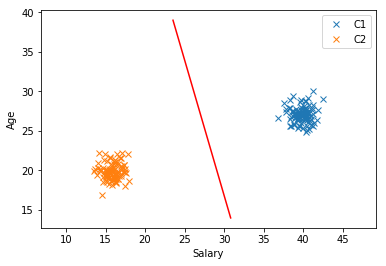

In [252]:
mean = [40, 27]
covar = [[1, 0], [0, 1]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, covar, 100).T
plt.plot(x, y, 'x',label = 'C1')
plt.axis('equal')

mean2 = [16, 20]
covar2 = [[1, 0], [0, 1]]

x, y = np.random.multivariate_normal(mean2, covar2, 100).T
plt.plot(x, y, 'x',label = 'C2')
plt.axis('equal')

x2 = np.array(list(range(14,40,1)))
x1 = (837.886 - 7*x2)/24.0
plt.plot(x1, x2, color = 'red')

plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend(loc = 'best')